In [1]:
# Examine SBGC results
#from netCDF4 import Dataset as NetCDFFile
import math
import numpy as np
import pandas as pd
import isamcalc_lib as isam
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy.ma as ma
from scipy.interpolate import griddata
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

In [11]:
obsx = np.array([36, 54, 88, 110, 117, 131, 135, 139, 147, 161, 168, 172, 180, 193, 199, 215, 226, 244])
len(obsx)

18

In [12]:
# define DF for observation which was extracted from the publications
obs = pd.DataFrame(columns=['Study_number','year','doy','Rh'])

# obs of study #2534
# Measured year is 2001 - 2002
sn = 2534*np.ones((14))
yr = 2001*np.ones((14))
obsx = np.array([133, 146, 170, 199, 204, 205, 206, 214, 231, 233, 235, 244, 242, 254])
# 17% contribution from root Ra
# 1.0368 is the transfer factor from umol C m-2 s-1 to gC m-2 day-1
obsy = 0.83 * 1.0368 * np.array([1.12, 1.54, 2.11, 2.48, 2.19, 1.81, 2.82, 1.83, 1.61, 1.38, 1.53, 1.61, 1.81, 1.81])


# obs of study #2396
# The data is selected from the BSFM (closed-canopy balck spruce with feather moss) community only
# since this site is more similar to the mature forest.
# Measured year is 1998 - 1999
sn = np.append(sn, 2396*np.ones((6)))
yr = np.append(yr, 1998*np.ones((6)))
obsx = np.append(obsx, np.array([196, 204, 209, 271, 278, 354]))
obsy = np.append(obsy, 0.83 * 1.0368 * np.array([4.03, 3.97, 3.08, 2.84, 2.58, 0.38]))

# obs of study #1382
# Boreal deciduous
sn = np.append(sn, 1382*np.ones((52)))
yr = np.append(yr, 1994*np.ones((52)))
obsx = np.append(obsx, np.array([106, 112, 114, 116, 120, 139, 143, 146, 147, 150, 152, 156, 158, 161, 162, 170, 173, 174, 180, 182, 187, 189, 194, 196, 197, 201, \
202, 203, 204, 205, 209, 211, 213, 217, 220, 222, 225, 227, 230, 231, 233, 238, 240, 243, 244, 245, 248, 249, 251, 252, 254, 258]))
obsy = np.append(obsy, 0.4 * 23.56364 * np.array([0.037,0.061, 0.034, 0.028, 0.046, 0.092, 0.107, 0.104, 0.098, 0.098, 0.098, 0.147, 0.115, 0.074, 0.074, 0.079, 0.167, 0.132, 0.144, 0.135, \
0.126, 0.126, 0.278, 0.202, 0.228, 0.402, 0.205, 0.349, 0.301, 0.19, 0.292, 0.351, 0.375, 0.245, 0.283, 0.26, 0.248, 0.242, 0.327, 0.242, \
0.215, 0.28, 0.224, 0.288, 0.241, 0.209, 0.159, 0.147, 0.267, 0.232, 0.214, 0.155]))

# obs of study #4604
sn = np.append(sn, 4604*np.ones((16)))
yr = np.append(yr, 2005*np.ones((16)))
obsx = np.append(obsx, np.array([28, 62, 100, 128, 136, 164, 183, 203, 214, 227, 245, 259, 266, 285, 304, 314]))
obsy = np.append(obsy, 0.7 * 6.545455 * np.array([0.041, 0.01, 0.072, 0.141, 0.257, 0.38, 0.491, 0.532, 0.576, 0.511, 0.473, 0.406, 0.318, 0.266, 0.276, 0.235]))

# obs of study #4166
sn = np.append(sn, 4166*np.ones((38)))
yr = np.append(yr, 2002*np.ones((38)))
obsx = np.append(obsx, np.array([106, 117, 119, 122, 130, 137, 142, 148, 153, 158, 163, 171, 177, 180, 194, 196, 198, 201, 204, 209, 213, 218, 223, 226, 230, 233, \
239, 242, 247, 252, 257, 260, 262, 269, 278, 284, 292, 294]))
obsy = np.append(obsy, 0.65 * 1.0368 * np.array([0.289, 0.557, 0.806, 0.959, 0.959, 0.825, 0.729, 0.979, 1.343, 1.688, 1.783, 2.109, 2.377, 2.837, 3.891, 4.696, 4.773, \
4.466, 3.47, 3.278, 2.339, 3.623, 4.313, 4.485, 3.144, 2.78, 1.822, 1.477, 2.282, 1.994, 1.649, 1.381, 1.094, 0.9, \
0.73, 0.86, 0.653, 0.442]))

# obs of study #5305
sn = np.append(sn, 5305*np.ones((18)))
yr = np.append(yr, 2007*np.ones((18)))
obsx = np.append(obsx, np.array([36, 54, 88, 110, 117, 131, 135, 139, 147, 161, 168, 172, 180, 193, 199, 215, 226, 244]))
obsy = np.append(obsy, 0.7 * 0.024 * np.array([6.27, 11.7, 6.46, 26.19, 53, 53.1, 76.28, 69.15, 95.97, 84.41, 53.19, 46.06, 137.16, 144.35, 119.37, 99.79, 81.97, 43.65]))

# obs of study #5391
# Tundra in Sweden
sn = np.append(sn, 5391*np.ones((10)))
yr = np.append(yr, 2007*np.ones((10)))
obsx = np.append(obsx, np.array([27, 64, 92, 137, 159, 178, 192, 234, 236, 245]))
obsy = np.append(obsy, 0.3 * 0.006545455 * np.array([161.65, 33.00, 22.07, 41.09, 560.68, 614.31, 732.67, 811.49, 733.97, 540.54]))

# obs of study #4212
# Grassland in Finland
sn = np.append(sn, 4212*np.ones((7)))
yr = np.append(yr, 2003*np.ones((7)))
obsx = np.append(obsx, np.array([169, 170, 171, 172, 175,  178,  180]))
obsy = np.append(obsy, 0.5 * 1.0368 * np.array([3.24, 3.92, 3.07, 3.4, 3.13,   3.13,  3.46]))

# obs of study #7198
# Shrubland in Finland
sn = np.append(sn, 7198*np.ones((7)))
yr = np.append(yr, 2003*np.ones((7)))
obsx = np.append(obsx, np.array([183, 220, 235, 246, 273, 288, 304]))
obsy = np.append(obsy, 0.55 * 0.3 * 0.024 * np.array([446.32, 377.88, 332.32, 309.51, 157.81, 119.83, 89.41]))

# Put all data into dataframe
obs.Study_number = sn
obs.year = yr
obs.doy = obsx
obs.Rh = obsy


In [ ]:
# # Read in the model simulation
# path='/global/cscratch1/sd/sshu3/SBGC/site/rh_eval/'
# site='boreal_2534/'
# fname='resp.txt'
# obs_fname=path+site+fname
# data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
# rh_prim = data.values

# rh_daily = np.zeros(((365*155),10))
# for i in np.arange(0,np.shape(rh_prim)[0]):
#     yr = i // 52
#     if(i % 52 == 0):
#         rh_daily[(i*7+yr):(i*7+yr+8),:] = 1000.*rh_prim[i,:]/7.
#     else:
#         rh_daily[(i*7+yr):(i*7+yr+7),:] = 1000.*rh_prim[i,:]/7.

# rh1m = np.zeros((np.shape(rh_daily)[0]))

# # Calcualte the 1-m mean Respiration
# for i in np.arange(0,np.shape(rh_daily)[0]):
#     rh1m[i] = isam.agg_1m_soil(rh_daily[i,0:8])

# # Calculate decadal mean of Rh for checking
# rh_decade = np.zeros((15))

# for t in np.arange(0,15):
#     rh_decade[t] = np.mean(rh1m[(t*3650):(t*3650+3650)])
  
# modx = np.arange(0,365)
# mody = rh1m[(140*365):(140*365+365)]
# obs_2534 = obsy
# mod_2534 = mody[obsx]
# plt.xlim([120, 300])
# plt.scatter(obsx, obsy)
# plt.plot(modx, mody)


In [13]:
obs

,Study_number,year,doy,Rh
0,2534.0,2001.0,133,0.963809
1,2534.0,2001.0,146,1.325238
2,2534.0,2001.0,170,1.815748
3,2534.0,2001.0,199,2.134149
4,2534.0,2001.0,204,1.884591
5,2534.0,2001.0,205,1.557585
6,2534.0,2001.0,206,2.426734
7,2534.0,2001.0,214,1.574796
8,2534.0,2001.0,231,1.385476
9,2534.0,2001.0,233,1.187551


In [36]:
np.nansum(mody)

411.995

In [9]:
np.sum(mody)

223.317

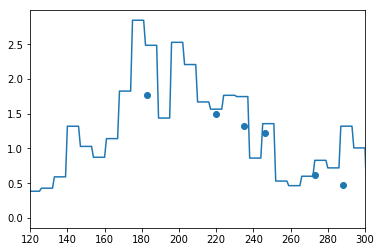

In [44]:
# Read in the obs of study #7198
# Shrubland in Finland
lat = 63.9
lon = 23.93

# Measured year is 2002 - 2004
obsx = np.array([183, 220, 235, 246, 273, 288, 304])# 505, 512, 526, 545, 560, 573, 585, 589, 600, \
                 #615, 643, 857, 876, 885, 898, 912, 939, 951, 972, 980])

# The sample AB1 is applied here since it to be the close to the multu-samples mean
# 55% of Reco is Rs
# Guessed 70% contribution from root Ra for this shrubland site since Ra is high comparing to Reco (since no data)
# 0.024 is the transfer factor from mg C m-2 h-1 to gC m-2 day-1
obsy = 0.55 * 0.3 * 0.024 * np.array([446.32, 377.88, 332.32, 309.51, 157.81, 119.83, 89.41])# 110.72, 216.74, 307.55, 428.63, \
                                #534.59, 625.4, 511.68, 443.47, 450.97, 359.96, 329.46, 191.59, 199.03, 327.76, 350.4, \
                                #532.12, 494.05, 456.09, 334.72, 205.88])

# Read in the model simulation
path='/global/cscratch1/sd/sshu3/SBGC/site/rh_eval/'
site='shrub_7198/'
fname='resp.txt'
obs_fname=path+site+fname
data = pd.read_csv(obs_fname,delim_whitespace=True,header=None)
rh_prim = data.values

rh_daily = np.zeros(((365*155),10))
for i in np.arange(0,np.shape(rh_prim)[0]):
    yr = i // 52
    if(i % 52 == 0):
        rh_daily[(i*7+yr):(i*7+yr+8),:] = 1000.*rh_prim[i,:]/7.
    else:
        rh_daily[(i*7+yr):(i*7+yr+7),:] = 1000.*rh_prim[i,:]/7.

rh1m = np.zeros((np.shape(rh_daily)[0]))

# Calcualte the 1-m mean Respiration
for i in np.arange(0,np.shape(rh_daily)[0]):
    rh1m[i] = isam.agg_1m_soil(rh_daily[i,0:8])

# Calculate decadal mean of Rh for checking
rh_decade = np.zeros((15))

for t in np.arange(0,15):
    rh_decade[t] = np.mean(rh1m[(t*3650):(t*3650+3650)])

modx = np.arange(0,365)
mody = rh1m[(140*365):(140*365+365)]
obs_7198 = obsy
mod_7198 = mody[obsx]
plt.xlim([120, 300])
plt.scatter(obsx, obsy)
plt.plot(modx, mody)

<Figure size 720x576 with 0 Axes>

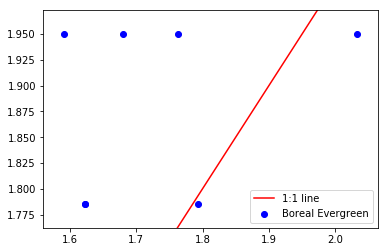

In [45]:
# Compile all data and make the scatter plot
obs_boreal = np.concatenate((obs_2534, obs_2396, obs_4604, obs_4166))
mod_boreal = np.concatenate((mod_2534, mod_2396, mod_4604, mod_4166))
obs_tundra = obs_5391
mod_tundra = mod_5391
obs_decid = obs_1382
mod_decid = mod_1382
obs_grass = obs_4212
mod_grass = mod_4212
obs_shrub = obs_7198
mod_shrub = mod_7198

fig = plt.figure(figsize=(10,8))
fig, ax = plt.subplots()
#plt.scatter(obs_boreal, mod_boreal, color='green')
#plt.scatter(obs_decid, mod_decid, color='gold')
#plt.scatter(obs_tundra, mod_tundra, color='brown')
plt.scatter(obs_grass, mod_grass, color='blue')
#plt.scatter(obs_shrub, mod_shrub, color='red')
line = mlines.Line2D([0, 4.5], [0, 4.5], color='red')
#transform = ax.transAxes
#line.set_transform(transform)
ax.add_line(line)
plt.legend(['1:1 line', 'Boreal Evergreen', 'Boreal Deciduous', 'Tundra', 'Grassland', 'Shrubland'])
#plt.savefig('Calibration_rh_res.jpg')

In [48]:
#========================================================
# Calculate R2
#========================================================

Xobs = obs_decid   # Obs CH4 flux
Xmod = mod_decid   # CH4 flux from ISAM

Xobs[np.isnan(Xmod)] = np.float('nan')
Xmod[np.isnan(Xobs)] = np.float('nan')
correlation = ma.corrcoef(ma.masked_invalid(Xobs), ma.masked_invalid(Xmod))[0,1]
r2 = correlation*correlation
print(r2)

0.27802330404299685


In [53]:
#========================================================
# Calculate ME for specific site
#========================================================
Xobs = obs_shrub   # Obs CH4 flux
Xmod = mod_shrub   # CH4 flux from ISAM
me = np.nanmean(Xobs-Xmod)
print(me)

-0.8202657632653063


/global/common/cori_cle7/software/python/2.7-anaconda-2019.07/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Tried to set a label via parameter u'y' in func 'errorbar' but couldn't find such an argument.
(This is a programming error, please report to the Matplotlib list!)


TypeError: errorbar() takes at least 3 arguments (1 given)

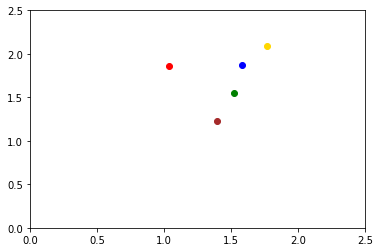

In [46]:
obs_b_mean = np.mean(obs_boreal)
obs_b_std = np.std(obs_boreal)
mod_b_mean = np.mean(mod_boreal)
mod_b_std = np.std(mod_boreal)

obs_d_mean = np.mean(obs_decid)
obs_d_std = np.std(obs_decid)
mod_d_mean = np.mean(mod_decid)
mod_d_std = np.std(mod_decid)

obs_t_mean = np.mean(obs_tundra)
obs_t_std = np.std(obs_tundra)
mod_t_mean = np.mean(mod_tundra)
mod_t_std = np.std(mod_tundra)

obs_g_mean = np.mean(obs_grass)
obs_g_std = np.std(obs_grass)
mod_g_mean = np.mean(mod_grass)
mod_g_std = np.std(mod_grass)

obs_s_mean = np.mean(obs_shrub)
obs_s_std = np.std(obs_shrub)
mod_s_mean = np.mean(mod_shrub)
mod_s_std = np.std(mod_shrub)

fig, ax = plt.subplots()
plt.xlim([0, 2.5])
plt.ylim([0, 2.5])
plt.scatter(obs_b_mean, mod_b_mean, color='green')
plt.scatter(obs_d_mean, mod_d_mean, color='gold')
plt.scatter(obs_t_mean, mod_t_mean, color='brown')
plt.scatter(obs_g_mean, mod_g_mean, color='blue')
plt.scatter(obs_s_mean, mod_s_mean, color='red')
ax.errorbar()
line = mlines.Line2D([0, 4.5], [0, 4.5], color='red')
ax.add_line(line)
plt.legend(['1:1 line', 'Boreal Evergreen', 'Boreal Deciduous', 'Tundra', 'Grassland', 'Shrubland'])
#plt.savefig('Calibration_rh_mean.jpg')

In [53]:
## Check atmospheric forcings
# Options
fpath='/global/cscratch1/sd/sshu3/SBGC/site/C14_sensitivity/143/143_control/'
fsite1='first/site_daily_1_met_2yr.txt'
fsite2='first_2/site_daily_1_met_2yr.txt'

# Data from paper Schenk and Jackson, 2002
f1 = fpath+fsite1
data = pd.read_csv(f1, delim_whitespace=True, header=None)
sw1 = data.values[:,2]
lw1 = data.values[:,3]

f2 = fpath+fsite2
data = pd.read_csv(f2, delim_whitespace=True, header=None)
sw2 = data.values[:,2]
lw2 = data.values[:,3]

# plt.plot(sw1)
# plt.plot(sw2)
# plt.plot(lw1)
# plt.plot(lw2)
# plt.legend(['SW_NCEP', 'SW_jra', 'LW_NCEP', 'LW_jra'])

sw1_mean = np.mean(sw1)
sw2_mean = np.mean(sw2)
lw1_mean = np.mean(lw1)
lw2_mean = np.mean(lw2)
print(sw1_mean)
print(sw2_mean)
print(lw1_mean)
print(lw2_mean)

4.6512885622763411